## Concentración de CO2 en Mauna Loa

http://www.esrl.noaa.gov/gmd/ccgg/trends/

### Parte 1

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from google.colab import files
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
files.upload()

#### Cargar y graficar la serie

In [ ]:
data = pd.read_csv("CO2.csv", index_col='Year')
ts = data["CO2 (ppm)"]
ts

Year
1958.208    315.71
1958.292    317.45
1958.375    317.50
1958.458    317.10
1958.542    315.86
             ...  
2016.125    404.02
2016.208    404.83
2016.292    407.42
2016.375    407.70
2016.458    406.81
Name: CO2 (ppm), Length: 700, dtype: float64

(1960.0, 2015.0)

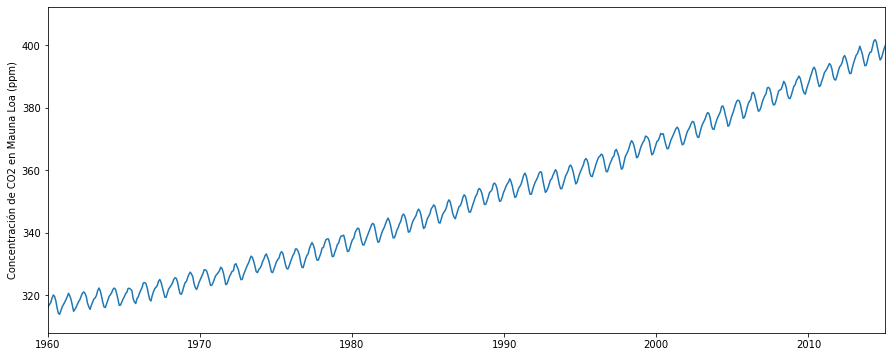

In [ ]:
plt.plot(ts)
plt.ylabel("Concentración de CO2 en Mauna Loa (ppm)")
plt.xlim(1960,2015)
#plt.savefig("CO2_Mauna_Loa.png")

#### Ajuste de curva

In [ ]:
def recta (x, a, b):
    return a*x + b

In [ ]:
tiempo = np.asarray(ts.index)   # conversión automática a fecha decimal
c02 = np.asarray(ts)
c02

In [ ]:
popt, pcov = curve_fit(recta, tiempo, c02)
a,b = popt
print("Ajuste: %.5f * x + %.3f" % (a,b))

Ajuste: 1.51819 * x + -2665.572


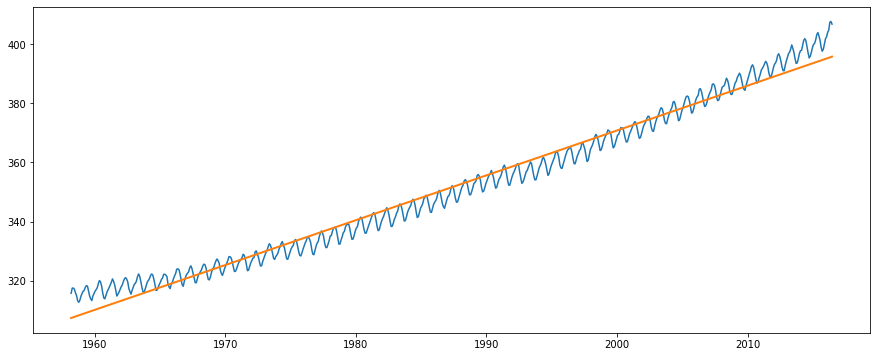

In [ ]:
tendencia = recta(tiempo,a,b)   # evaluación automática sobre todos los elementos de fechas
plt.plot(tiempo,c02)
plt.plot(tiempo,tendencia,lw=2)

In [ ]:
def parabola (x, a, b, c):
    return a*x**2 + b*x + c

In [ ]:
popt, pcov = curve_fit(parabola, tiempo, c02)
a,b,c = popt
print("Ajuste: %.5f * x^2 + %.5f * x + %.2f" % (a,b,c))

Ajuste: 0.01244 * x^2 + -47.93731 * x + 46473.18


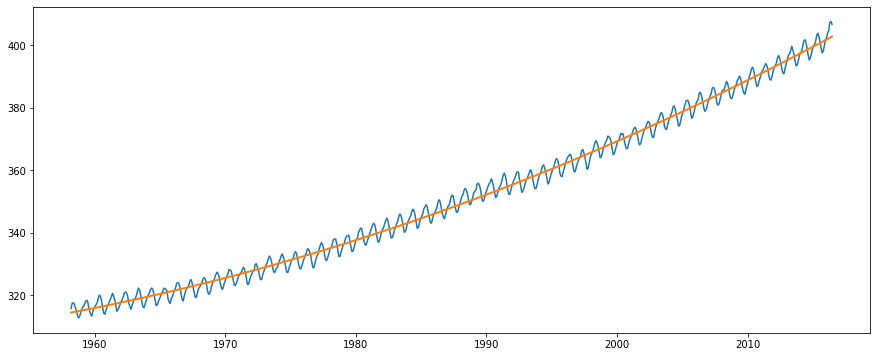

In [ ]:
tendencia = parabola(tiempo,a,b,c)
plt.plot(tiempo,c02)
plt.plot(tiempo,tendencia,lw=2)

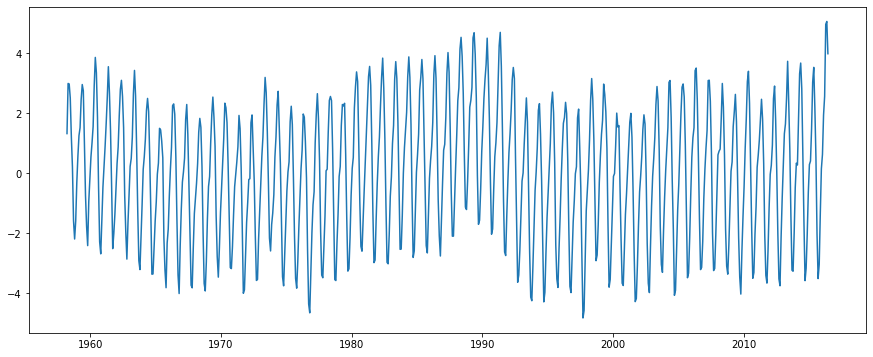

In [ ]:
plt.plot(ts - tendencia)

### Parte 2

#### Media Móvil Simple

In [ ]:
ts_SMA = ts.rolling(window=12, center=True).mean()

Text(0, 0.5, 'Concentración de CO2 en Mauna Loa (ppm)')

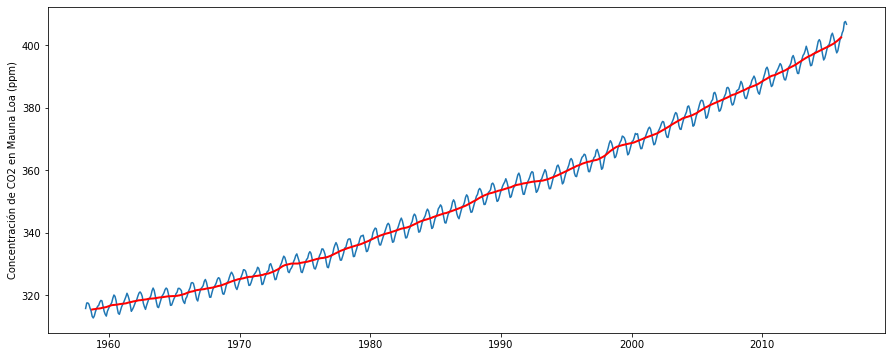

In [ ]:
plt.plot(ts)
plt.plot(ts_SMA,"-",color="red",lw=2)
plt.ylabel("Concentración de CO2 en Mauna Loa (ppm)")

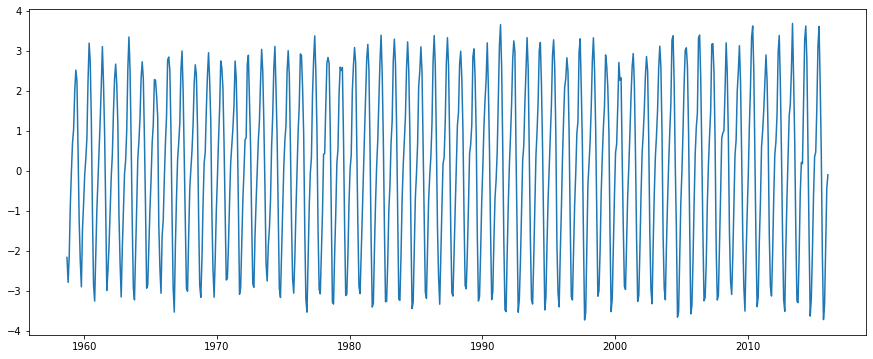

In [ ]:
ts_dif = ts - ts_SMA
plt.plot(ts_dif)

#### Probando con diferentes longitudes de suavizado

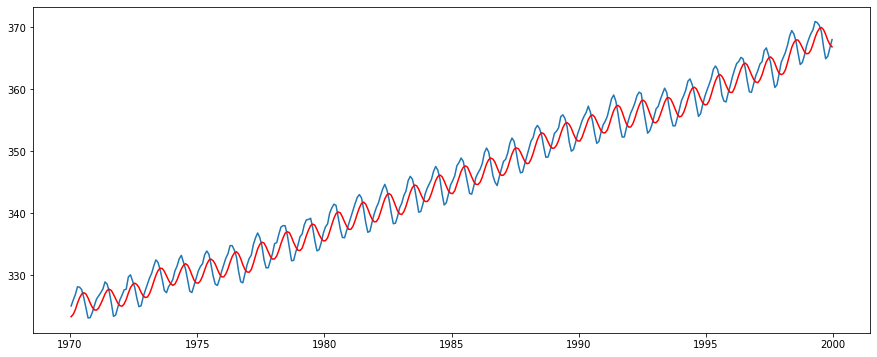

In [ ]:
ts_SMA2 = ts.rolling(window=6).mean()
plt.plot(ts[1970:2000])
plt.plot(ts_SMA2[1970:2000],color="red")

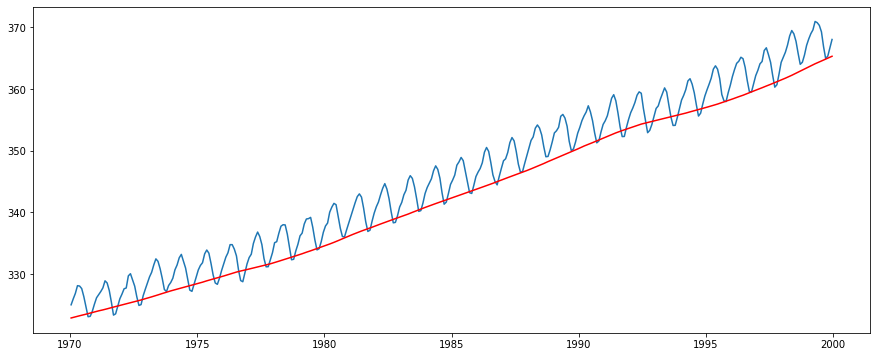

In [ ]:
ts_SMA2 = ts.rolling(window=48).mean()
plt.plot(ts[1970:2000])
plt.plot(ts_SMA2[1970:2000],color="red")

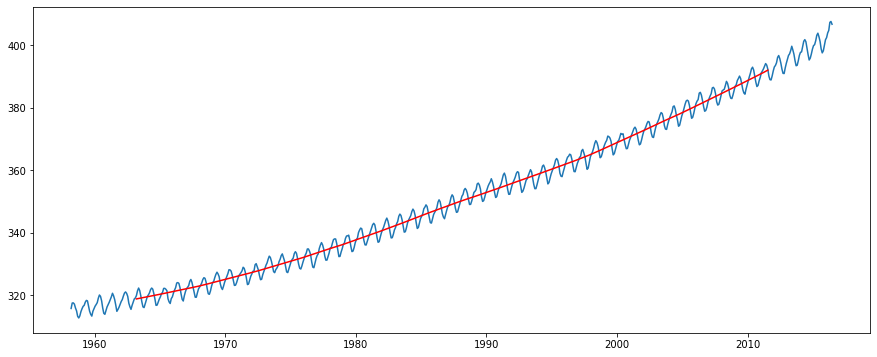

In [ ]:
ts_SMA2 = ts.rolling(window=120, center=True).mean()
plt.plot(ts)
plt.plot(ts_SMA2,color="red")

#### Ajuste de la estacionalidad 

In [ ]:
def estaciones(x, a, b, c, d):
    return a*np.cos(b*x + c) + d

In [ ]:
ts_dif.dropna(inplace=True)
tiempo_dif = np.asarray(ts_dif.index)
CO2_dif = np.asarray(ts_dif)

In [ ]:
popt, pcov = curve_fit(estaciones, tiempo_dif, CO2_dif)
modelo_estaciones = estaciones(tiempo, *popt)   # sintaxis exótica: automáticamente "des-compacta" los argumentos
print(popt)

[-3.00105079e-02  9.82290606e-01  3.65266747e+01  4.72577813e-02]


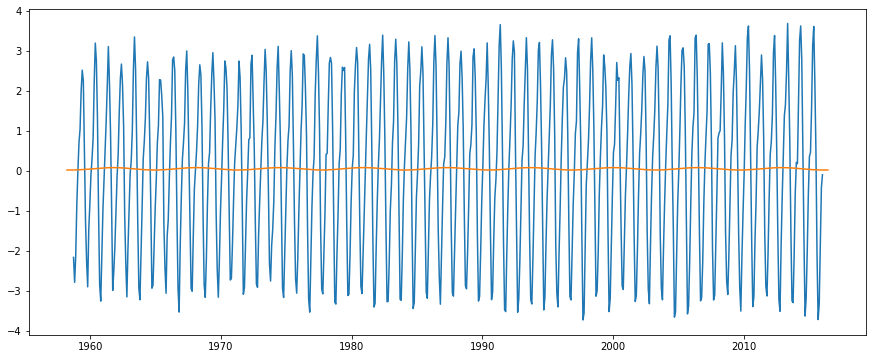

In [ ]:
plt.plot(ts_dif)
plt.plot(tiempo, modelo_estaciones)

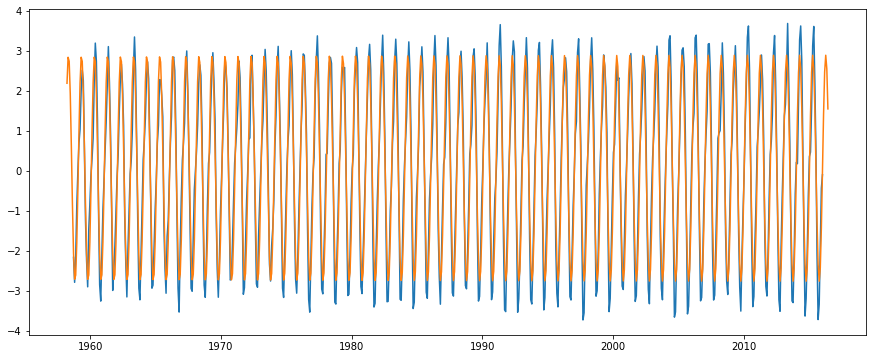

In [ ]:
popt, pcov = curve_fit(estaciones, tiempo_dif, CO2_dif, p0=(3,2*np.pi,0,0))
modelo_estaciones = estaciones(tiempo, *popt)
plt.plot(ts_dif)
plt.plot(tiempo, modelo_estaciones)

ValueError: ignored

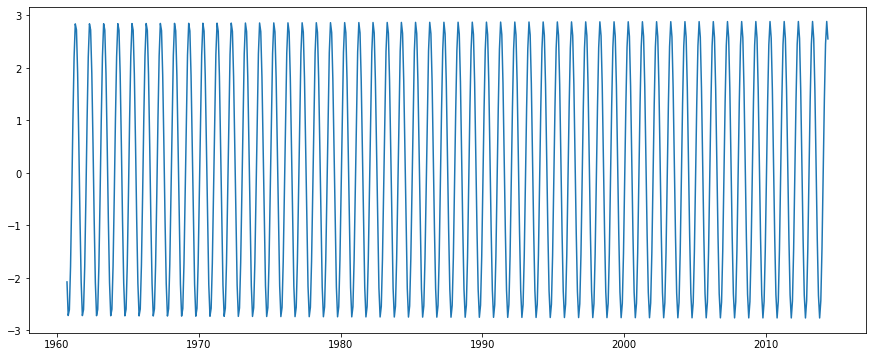

In [ ]:
'''print(ts_dif.index)
print(ts_dif.iloc[0])
ts_dif
print(tiempo[6:-5])'''
#print(ts_dif['co2'])
#dife=(ts_dif-modelo_estaciones).drop
tiempo=tiempo[6:-5]
modelo_estaciones2=estaciones(tiempo, *popt)
plt.plot(tiempo, modelo_estaciones2)
plt.plot(tiempo,ts_dif-modelo_estaciones2)

#### Modelo con ambas componentes

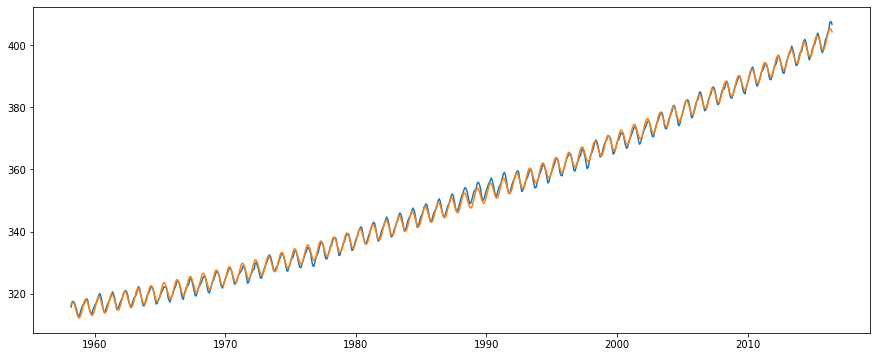

In [ ]:
plt.plot(ts)
modelo = tendencia + modelo_estaciones
plt.plot(tiempo,modelo)

#### Promedio móvil exponencial

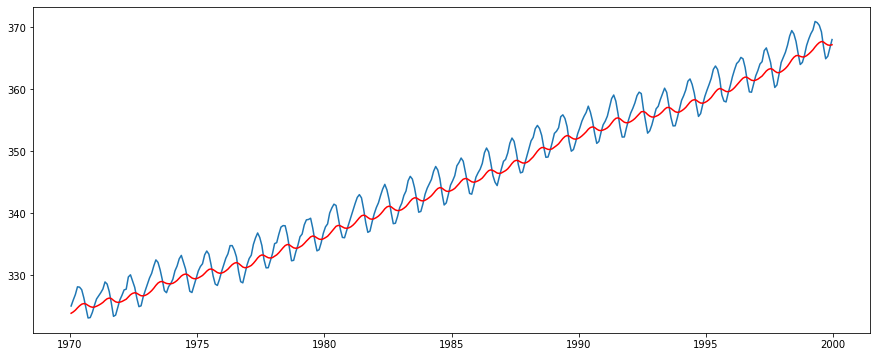

In [ ]:
ts_EWM = ts.ewm(adjust=False,alpha=0.1).mean()
plt.plot(ts[1970:2000])
plt.plot(ts_EWM[1970:2000],color="red")

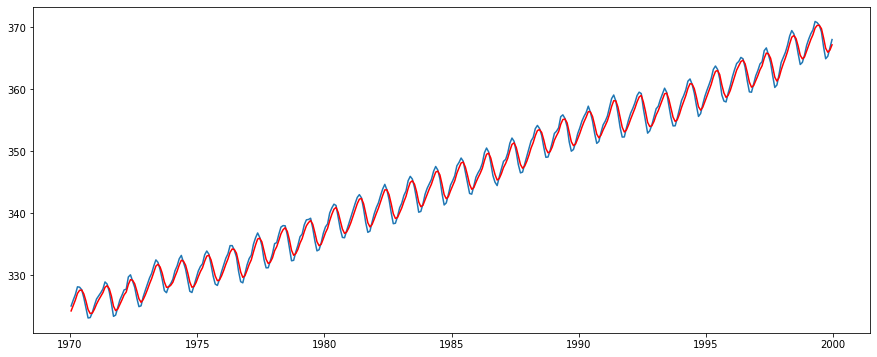

In [ ]:
ts_EWM = ts.ewm(adjust=False,alpha=0.5).mean()
plt.plot(ts[1970:2000])
plt.plot(ts_EWM[1970:2000],color="red")